In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


In [2]:
#  Load the Dataset
df = pd.read_csv("Dataset\Fraud.csv") 
print("Dataset Loaded")

Dataset Loaded


In [3]:
#  Basic Overview
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
print(df.info())
print("\nSummary Stats:\n")
print(df.describe())

Shape of dataset: (6362620, 11)

Columns:
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

Summary Stats:

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.33883

In [4]:
#  Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
# Class Distribution (Fraud vs Non-Fraud)
print("\nFraud Distribution:\n", df['isFraud'].value_counts())


Fraud Distribution:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64


C:\Users\biswa\AppData\Local\Temp\ipykernel_15708\2698238720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='isFraud', palette='coolwarm')


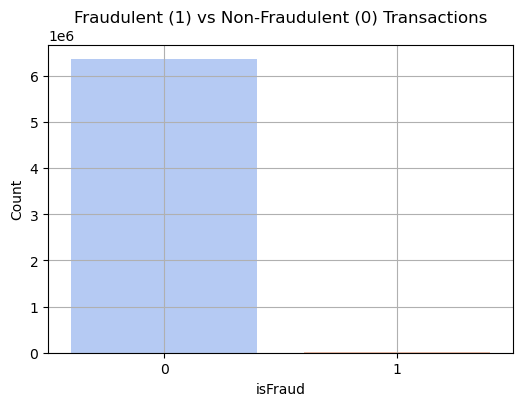

In [6]:
# Target Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud', palette='coolwarm')
plt.title('Fraudulent (1) vs Non-Fraudulent (0) Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [7]:
# Encode type column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Drop unnecessary string columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Define features and target
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']


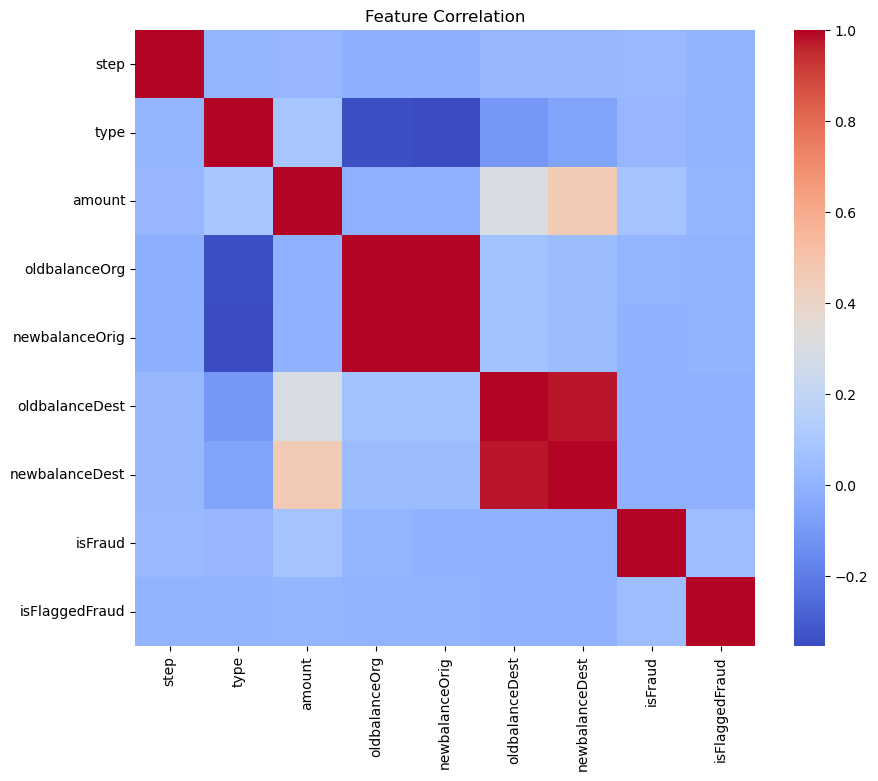

In [8]:
#  Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


Original Class Distribution: Counter({0: 6354407, 1: 8213})
After SMOTE Class Distribution: Counter({0: 4765805, 1: 4765805})


C:\Users\biswa\AppData\Local\Temp\ipykernel_15708\809246375.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette='viridis')


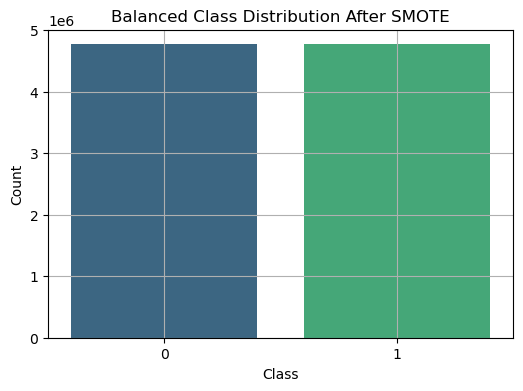

In [ ]:
# Before SMOTE
print("Original Class Distribution:", Counter(y))

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#  Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# After SMOTE
print("After SMOTE Class Distribution:", Counter(y_train_res))

# Visualize new class balance
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title('Balanced Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [10]:
# Import ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, roc_curve

In [11]:
# Models to Train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [12]:
#  Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

In [13]:
# Train and Evaluate
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train_res, y_train_res)
    evaluate_model(model, X_test, y_test)
    print("-"*50)


Training: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1588602
           1       0.03      0.88      0.06      2053

    accuracy                           0.96   1590655
   macro avg       0.51      0.92      0.52   1590655
weighted avg       1.00      0.96      0.98   1590655

Confusion Matrix:
 [[1527216   61386]
 [    244    1809]]
F1 Score: 0.055449975478175574
ROC AUC Score: 0.9212540073581519
--------------------------------------------------

Training: Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.69      0.96      0.80      2053

    accuracy                           1.00   1590655
   macro avg       0.85      0.98      0.90   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix:
 [[1587730     872]
 [     85    1968]]
F1 Score: 

c:\Users\biswa\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:31:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.35      0.99      0.52      2053

    accuracy                           1.00   1590655
   macro avg       0.67      0.99      0.76   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix:
 [[1584805    3797]
 [     21    2032]]
F1 Score: 0.5156051763511799
ROC AUC Score: 0.9936904574437061
--------------------------------------------------


In [14]:
#Hyperparameter Tuning & Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [15]:
# Pipeline for Decision Tree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])


In [16]:
# Decision Tree parameters
dt_params = {
    'dt__max_depth': [3, 5, 10],
    'dt__min_samples_split': [2, 5],
}

# XGBoost parameters
xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.01, 0.1],
}


In [17]:
# Decision Tree Tuning
grid_dt = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# XGBoost Tuning
grid_xgb = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)


c:\Users\biswa\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_poli...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 5],
                         'xgb__n_estimators': [100, 200]},
             scoring='accuracy')

In [18]:
# Evaluate Decision Tree
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Evaluate XGBoost
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Decision Tree Results:
[[1588544      58]
 [    513    1540]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.96      0.75      0.84      2053

    accuracy                           1.00   1590655
   macro avg       0.98      0.88      0.92   1590655
weighted avg       1.00      1.00      1.00   1590655

Accuracy: 0.99964102838139
XGBoost Results:
[[1588535      67]
 [    359    1694]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.96      0.83      0.89      2053

    accuracy                           1.00   1590655
   macro avg       0.98      0.91      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655

Accuracy: 0.9997321857976745


In [19]:
# Save best XGBoost model and scaler
joblib.dump(best_xgb, 'xgb_fraud_model.pkl')
print("Model saved as 'xgb_fraud_model.pkl'")
joblib.dump(best_dt, 'dt_fraud_model.pkl')
print("Scaler saved as 'dt_fraud_model.pkl'")


Model saved as 'xgb_fraud_model.pkl'
Scaler saved as 'dt_fraud_model.pkl'
